# TEST

Dummy notebook to test functions

In [1]:
import nbimporter
import prepData as prep
import fitFunc as fits
import Statistics as stat
import matplotlib.pyplot as plt

### Test prepData

In [2]:
data,center,length = prep.load_dataset(395)
freq, fft, weights, ref = prep.prep_data(data,center, length=length,subrun=0)

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2


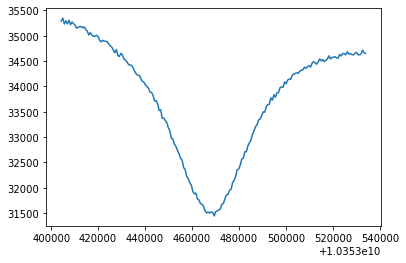

In [3]:
plt.plot(freq,fft)

### Test Fits

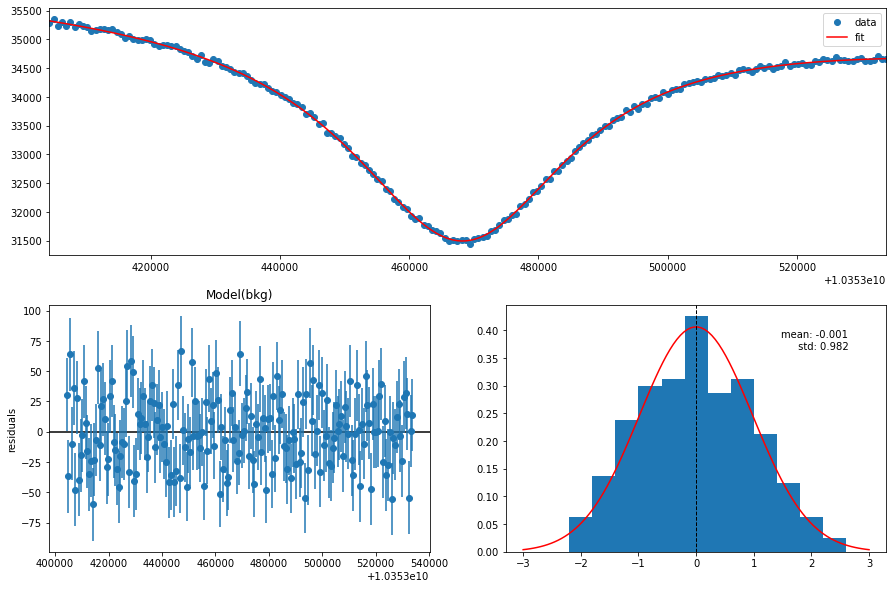

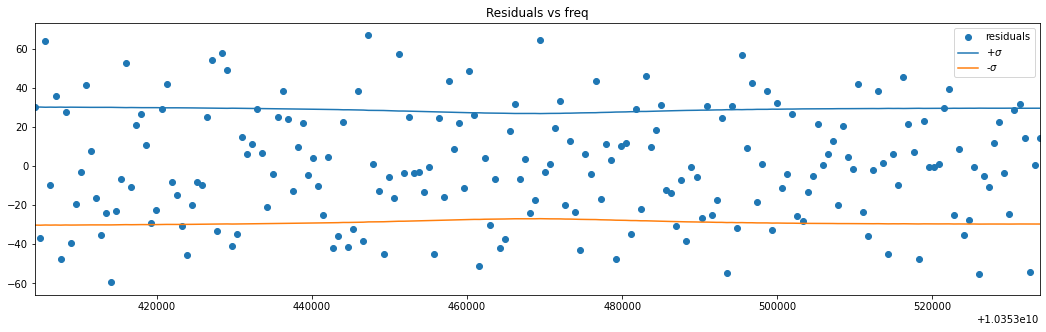

In [4]:
res_bkg = fits.fit_bkg(freq, fft, weights, center, ref)
fits.plot_fit(freq, fft, weights, res_bkg)

In [5]:
mu0s=[]
for x0 in freq:
    res_sig = fits.fit_sig(freq, fft, weights, x0, res_bkg, fits.signal_gauss,par_vary=False)
    mu0s.append(res_sig.best_values["mu"])
    

In [6]:
import numpy as np
freq[np.argmax(mu0s)]

10353409505.208334

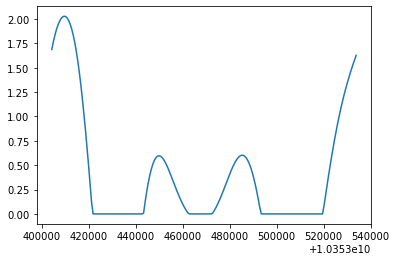

In [7]:
plt.plot(freq,mu0s)

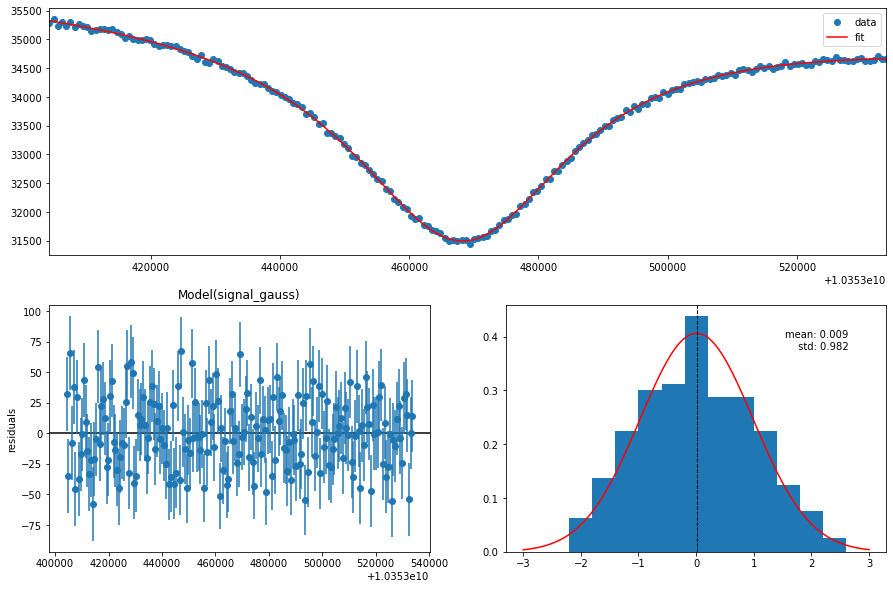

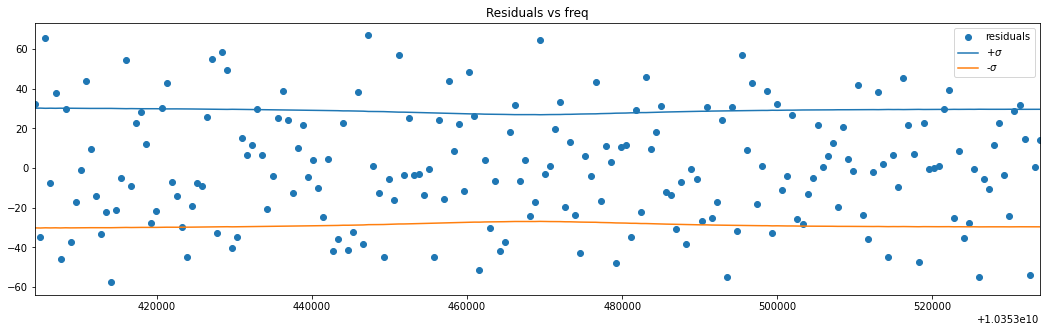

In [8]:
res_sig = fits.fit_sig(freq, fft, weights, 10353409505.208334, res_bkg, fits.signal_gauss,par_vary=False)
fits.plot_fit(freq, fft, weights, res_sig)

### Test Statistics

In [9]:
q0_obs = stat.lh_ratio(fft, res_bkg, res_sig)
q0_obs

0.10792702033313617

In [ ]:
z_vec=[]
i=0
for x0 in freq:
    z = stat.significance(freq, fft, weights, res_bkg, center, ref, x0, fits.signal_gauss, n=300, draw=False)
    
    print("trial:",i)
    if i%10 == 0:
        print("x0:",x0)
        print("z:",z)
    
    print("------------------------")
    i+=1
    z_vec.append(z)

In [ ]:
plt.plot(freq,z_vec)

In [35]:
z_vec=np.array(z_vec)
np.max(z_vec),freq[np.argmax(z_vec)]

(1.3205044038672804, 10353412109.375)

### Significance plot examples

In [10]:
x0_1=10353412109.375
x0_2=center
x0_3=freq[116]

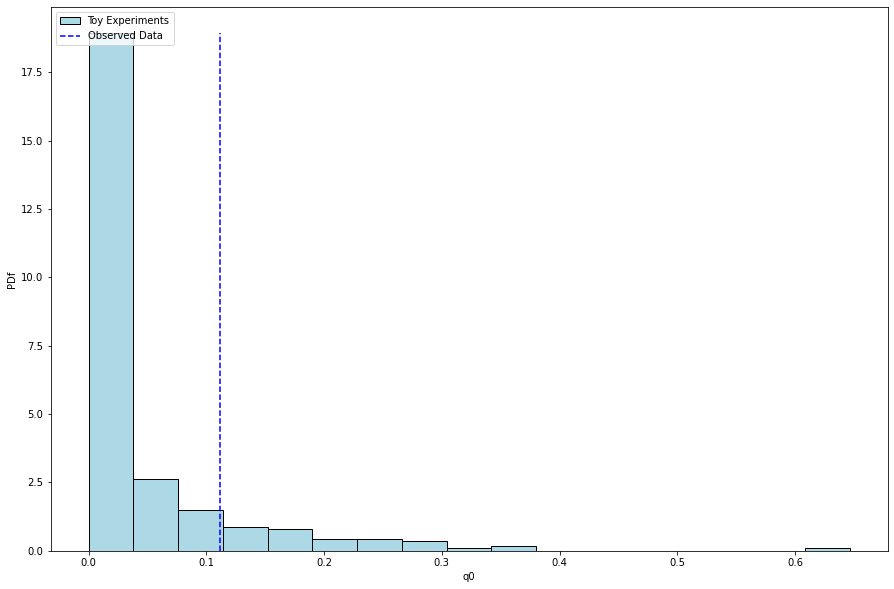

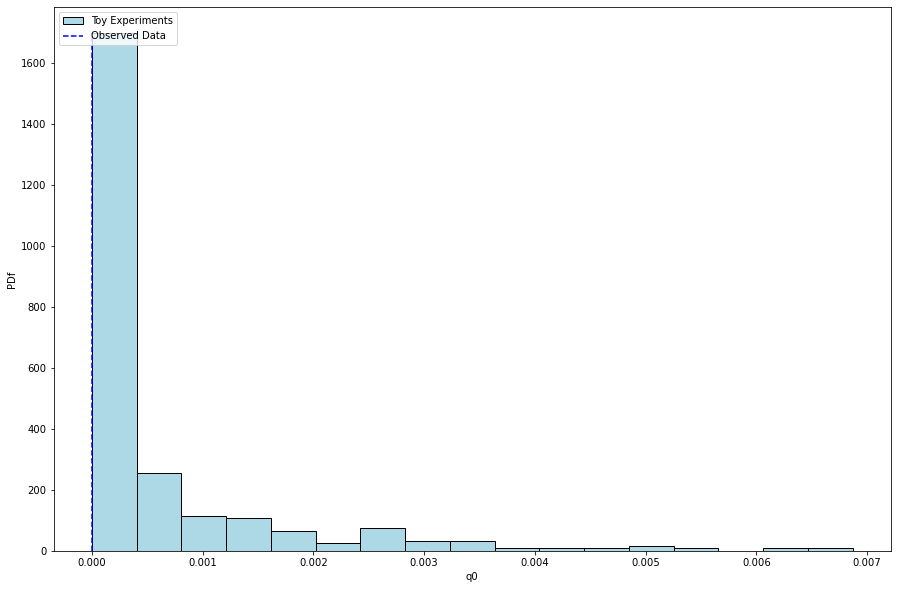

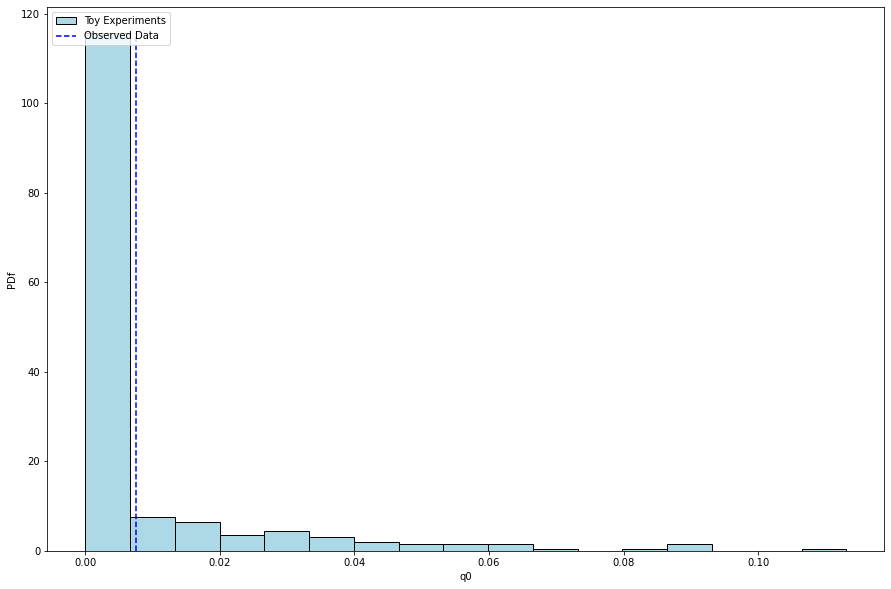

In [43]:
z = stat.significance(freq, fft, weights, res_bkg, center, ref, x0_1, fits.signal_gauss, n=300, draw=True)
z = stat.significance(freq, fft, weights, res_bkg, center, ref, x0_2, fits.signal_gauss, n=300, draw=True)
z = stat.significance(freq, fft, weights, res_bkg, center, ref, x0_3, fits.signal_gauss, n=300, draw=True)

### Confidence interval

In [11]:
mu_fix=np.array([0])

Testing 0
q_mu_obs: 0.11164875730560198
ciccio sono uguali!
ciccio sono uguali!
ciccio sono uguali!
ciccio sono uguali!
ciccio sono uguali!
ciccio sono uguali!
ciccio sono uguali!
ciccio sono uguali!
ciccio sono uguali!
ciccio sono uguali!


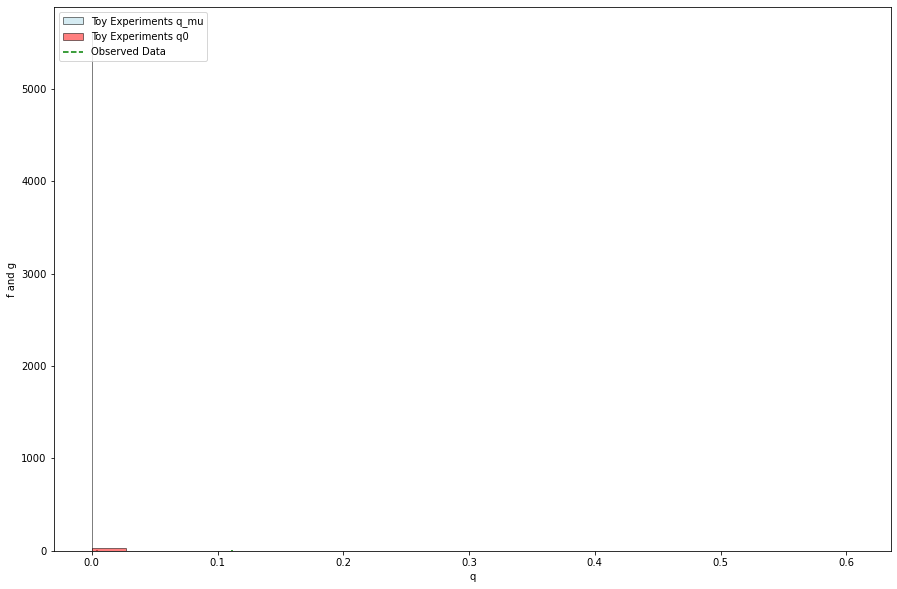

Mu:  0 
p_mu = 0.0   p_b = 0.098   ratio = 0.0 



0

In [12]:
mu_ci = stat.CI(freq, fft, weights, res_bkg, center, ref, x0_1, mu_fix, fits.signal_gauss, n=500, verbose = True)
mu_ci